<a href="https://colab.research.google.com/github/jrohauer/ECGR4105/blob/main/HW5_tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

#Data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [62]:
def linear_model(t_u,w, b):
    return w*t_u+b


def model(t_u, w1, w2, b):
    return w2*t_u**2+w1*t_u+b



def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

w1=0.0
w2=0.0
b=0.0

params = torch.tensor([w1,w2,b], requires_grad=True)

In [63]:
def training_loop(n_epochs,learning_rate,params,t_u,t_c):
    for epoch in range(1,n_epochs +1):
        if params.grad is not None:
            params.grad.zero_()

        t_p=model(t_u,*params)
        loss=loss_fn(t_p,t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            params -=learning_rate * params.grad

        if epoch % 500 ==0:
            print('Epoch %d, Loss %f' % (epoch,float(loss)))

    return params

In [64]:
for i in lrs:
    print("")
    print("Learning Rate is "+ str(i)+" Optimizer = SGD")
    learning_rate = float(i)
    params = torch.tensor([w1,w2,b], requires_grad=True)
    optimizer = optim.SGD([params], lr=learning_rate)
    training_loop(n_epochs=5000,learning_rate = learning_rate, params=params, t_u=t_u,t_c=t_c)


for i in lrs:
    print("")
    print("Learning Rate is "+ str(i)+" Optimizer = Adam")
    learning_rate = float(i)
    params = torch.tensor([w1,w2,b], requires_grad=True)
    optimizer = optim.Adam([params], lr=learning_rate)
    training_loop(n_epochs=5000,learning_rate = learning_rate, params=params, t_u=t_u,t_c=t_c)


Learning Rate is 0.1 Optimizer = SGD
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan

Learning Rate is 0.01 Optimizer = SGD
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan

Learning Rate is 0.001 Optimizer = SGD
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan

Learning Rate is 0.1 Optimizer = Adam
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan

Learnin

In [65]:
#Best Model
learning_rate = 0.00000001
params = torch.tensor([w1,w2,b], requires_grad=True)
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(n_epochs=5000,learning_rate = learning_rate, params=params, t_u=t_u,t_c=t_c)

t_p = model(t_u,*params)
MSE = loss_fn(t_p,t_c)

#Linear model
l_params = torch.tensor([0.5367,-17.3021], requires_grad=True)
linear_t_p = linear_model(t_u,*l_params)
L_MSE = loss_fn(linear_t_p,t_c)

Epoch 500, Loss 8.015685
Epoch 1000, Loss 7.990523
Epoch 1500, Loss 7.965514
Epoch 2000, Loss 7.940656
Epoch 2500, Loss 7.915949
Epoch 3000, Loss 7.891390
Epoch 3500, Loss 7.866981
Epoch 4000, Loss 7.842717
Epoch 4500, Loss 7.818600
Epoch 5000, Loss 7.794631


Text(0, 0.5, 'Celcius')

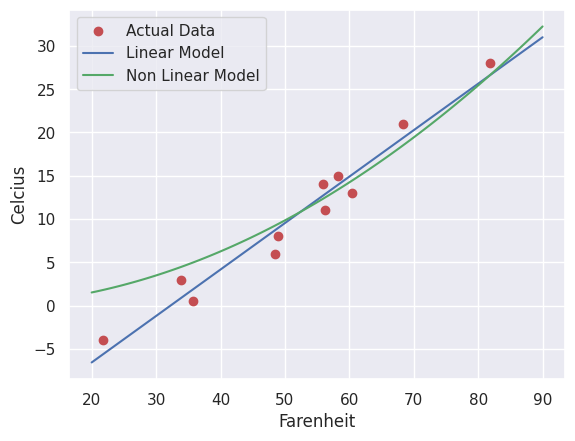

In [66]:
linear_X = np.linspace(20,90,100)
linear_Y = .5367*linear_X-17.3012

np_params=params.detach().numpy()
nlinear_Y = np_params[1]*linear_X**2+np_params[0]*linear_X-np_params[2]
plt.scatter(t_u, t_c,color='r', label='Actual Data')
plt.plot(linear_X,linear_Y, label='Linear Model')
plt.plot(linear_X,nlinear_Y, color='g', label='Non Linear Model')
plt.legend()

plt.xlabel("Farenheit")
plt.ylabel("Celcius")

In [67]:
#Problem 2
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

#Preprocessing
file_path = '/content/drive/My Drive/ML_data/Housing.csv'
dataset = pd.read_csv(file_path)

#Mapping text to number
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)

#Split data into training and validation
np.random.seed(17)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

#Separate Y and X inputs

X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories','parking']

Y_train = np.array(df_train['price'])
X_train = df_train[X_Vars]

Y_test = np.array(df_test['price'])
X_test = df_test[X_Vars]

#Min Max or Standard normalize
scalerMM = MinMaxScaler()
X_train = scalerMM.fit_transform(X_train)
X_test = scalerMM.fit_transform(X_test)

Y_train = torch.tensor(Y_train)
X_train = torch.tensor(X_train)
Y_test = torch.tensor(Y_test)
X_test = torch.tensor(X_test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
def house_model(X_train, w0, w1, w2, w3, w4, b):
    return (X_train[:, 0] * w0) + (X_train[:, 1] * w1) + (X_train[:, 2] * w2) + (X_train[:, 3] * w3) + (X_train[:, 4] * w4) + b


def house_loss_fn(est_price, price):
    return torch.sqrt(torch.mean((est_price-price)**2))

w0=0.0
w1=0.0
w2=0.0
w3=0.0
w4=0.0
b=0.0


params = torch.tensor([w0,w1,w2,w3,w4,b], requires_grad=True)

In [69]:

def training_loop(n_epochs,learning_rate,params,X_train,Y_train):
    for epoch in range(1,n_epochs +1):
        if params.grad is not None:
            params.grad.zero_()

        est_price=house_model(X_train,*params)
        loss=house_loss_fn(est_price,Y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            params -=learning_rate * params.grad

        if epoch % 500 ==0:
            print('Epoch %d, Loss %f' % (epoch,float(loss)))

    return params

In [70]:
lrs = ['0.1','0.01','0.001']

for i in lrs:
    print("")
    print("Learning Rate is "+ str(i)+" Optimizer = SGD")
    learning_rate = float(i)
    params = torch.tensor([w0,w1,w2,w3,w4,b], requires_grad=True)
    optimizer = optim.SGD([params], lr=learning_rate)
    training_loop(n_epochs=5000,learning_rate = learning_rate, params=params, X_train=X_train,Y_train=Y_train)


for i in lrs:
    print("")
    print("Learning Rate is "+ str(i)+" Optimizer = Adam")
    learning_rate = float(i)
    params = torch.tensor([w0,w1,w2,w3,w4,b], requires_grad=True)
    optimizer = optim.Adam([params], lr=learning_rate)
    training_loop(n_epochs=5000,learning_rate = learning_rate, params=params, X_train=X_train,Y_train=Y_train)



Learning Rate is 0.1 Optimizer = SGD
Epoch 500, Loss 5145514.554778
Epoch 1000, Loss 5145389.948722
Epoch 1500, Loss 5145265.341379
Epoch 2000, Loss 5145140.734721
Epoch 2500, Loss 5145016.128072
Epoch 3000, Loss 5144891.521356
Epoch 3500, Loss 5144766.915415
Epoch 4000, Loss 5144642.309766
Epoch 4500, Loss 5144517.706257
Epoch 5000, Loss 5144393.106874

Learning Rate is 0.01 Optimizer = SGD
Epoch 500, Loss 5145626.475612
Epoch 1000, Loss 5145614.015175
Epoch 1500, Loss 5145601.555439
Epoch 2000, Loss 5145589.095576
Epoch 2500, Loss 5145576.635672
Epoch 3000, Loss 5145564.175772
Epoch 3500, Loss 5145551.715772
Epoch 4000, Loss 5145539.252864
Epoch 4500, Loss 5145526.789532
Epoch 5000, Loss 5145514.325904

Learning Rate is 0.001 Optimizer = SGD
Epoch 500, Loss 5145637.667641
Epoch 1000, Loss 5145636.421618
Epoch 1500, Loss 5145635.175598
Epoch 2000, Loss 5145633.929567
Epoch 2500, Loss 5145632.683373
Epoch 3000, Loss 5145631.437113
Epoch 3500, Loss 5145630.190854
Epoch 4000, Loss 51456

In [71]:
#Best Model
learning_rate = 0.1
params = torch.tensor([w0,w1,w2,w3,w4,b], requires_grad=True)
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(n_epochs=5000,learning_rate = learning_rate, params=params, X_train=X_train,Y_train=Y_train)
params

test_price = house_model(X_test,*params)
test_RMSE = house_loss_fn(test_price,Y_test)

Epoch 500, Loss 5145464.930339
Epoch 1000, Loss 5145290.598665
Epoch 1500, Loss 5145116.261655
Epoch 2000, Loss 5144941.926066
Epoch 2500, Loss 5144767.591994
Epoch 3000, Loss 5144593.267519
Epoch 3500, Loss 5144418.947819
Epoch 4000, Loss 5144244.635809
Epoch 4500, Loss 5144070.336010
Epoch 5000, Loss 5143896.039197


In [72]:
#Problem 3
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#Preprocessing
file_path = '/content/drive/My Drive/ML_data/Housing.csv'
dataset = pd.read_csv(file_path)

#Mapping text to number
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)

#Split data into training and validation
np.random.seed(17)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

#Separate Y and X inputs

X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

Y_train = np.array(df_train['price'])
X_train = df_train[X_Vars]

Y_test = np.array(df_test['price'])
X_test = df_test[X_Vars]

#Min Max or Standard normalize
scalerMM = MinMaxScaler()
X_train = scalerMM.fit_transform(X_train)
X_test = scalerMM.fit_transform(X_test)

Y_train = torch.tensor(Y_train)
X_train = torch.tensor(X_train)
Y_test = torch.tensor(Y_test)
X_test = torch.tensor(X_test)

In [73]:
def house_model(X_train, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, b):
    return (X_train[:, 0] * w0) + (X_train[:, 1] * w1) + (X_train[:, 2] * w2) + (X_train[:, 3] * w3) + (X_train[:, 4] * w4) + (X_train[:, 5] * w5) + (X_train[:, 6] * w6) + (X_train[:, 7] * w7)+ (X_train[:, 8] * w8)+ (X_train[:, 9] * w9)+ (X_train[:, 10] * w10)+ b


def house_loss_fn(est_price, price):
    return torch.sqrt(torch.mean((est_price-price)**2))

w0=0
w1=0.0
w2=0.0
w3=0.0
w4=0.0
w5=0.0
w6=0.0
w7=0.0
w8=0.0
w9=0.0
w10=0.0
b=0.0


params = torch.tensor([w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b], requires_grad=True)

In [74]:
def training_loop(n_epochs,learning_rate,params,X_train,Y_train):
    for epoch in range(1,n_epochs +1):
        if params.grad is not None:
            params.grad.zero_()

        est_price=house_model(X_train,*params)
        loss=house_loss_fn(est_price,Y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            params -=learning_rate * params.grad

        if epoch % 500 ==0:
            print('Epoch %d, Loss %f' % (epoch,float(loss)))

    return params

In [75]:
lrs = [0.1,0.01,0.001,0.0001]

for i in lrs:
    print("")
    print("Learning Rate is "+ str(i)+" Optimizer = SGD")
    learning_rate = float(i)
    params = torch.tensor([w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b], requires_grad=True)
    optimizer = optim.SGD([params], lr=learning_rate)
    training_loop(n_epochs=5000,learning_rate = learning_rate, params=params, X_train=X_train,Y_train=Y_train)


for i in lrs:
    print("")
    print("Learning Rate is "+ str(i)+" Optimizer = Adam")
    learning_rate = float(i)
    params = torch.tensor([w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b], requires_grad=True)
    optimizer = optim.Adam([params], lr=learning_rate)
    training_loop(n_epochs=5000,learning_rate = learning_rate, params=params, X_train=X_train,Y_train=Y_train)


Learning Rate is 0.1 Optimizer = SGD
Epoch 500, Loss 5145407.516004
Epoch 1000, Loss 5145175.655058
Epoch 1500, Loss 5144943.798838
Epoch 2000, Loss 5144711.945818
Epoch 2500, Loss 5144480.095262
Epoch 3000, Loss 5144248.246989
Epoch 3500, Loss 5144016.376603
Epoch 4000, Loss 5143784.500861
Epoch 4500, Loss 5143552.626407
Epoch 5000, Loss 5143320.756628

Learning Rate is 0.01 Optimizer = SGD
Epoch 500, Loss 5145615.771585
Epoch 1000, Loss 5145592.585966
Epoch 1500, Loss 5145569.400237
Epoch 2000, Loss 5145546.214232
Epoch 2500, Loss 5145523.028460
Epoch 3000, Loss 5145499.842857
Epoch 3500, Loss 5145476.657167
Epoch 4000, Loss 5145453.468585
Epoch 4500, Loss 5145430.279582
Epoch 5000, Loss 5145407.089666

Learning Rate is 0.001 Optimizer = SGD
Epoch 500, Loss 5145636.597249
Epoch 1000, Loss 5145634.278659
Epoch 1500, Loss 5145631.960114
Epoch 2000, Loss 5145629.641579
Epoch 2500, Loss 5145627.322832
Epoch 3000, Loss 5145625.003882
Epoch 3500, Loss 5145622.684961
Epoch 4000, Loss 51456

In [76]:
#Best Model
learning_rate = 0.1
params = torch.tensor([w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b], requires_grad=True)
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(n_epochs=5000,learning_rate = learning_rate, params=params, X_train=X_train,Y_train=Y_train)
params

test_price = house_model(X_test,*params)
test_RMSE = house_loss_fn(test_price,Y_test)

Epoch 500, Loss 5145307.977479
Epoch 1000, Loss 5144976.374828
Epoch 1500, Loss 5144644.769831
Epoch 2000, Loss 5144313.170352
Epoch 2500, Loss 5143981.569387
Epoch 3000, Loss 5143649.978318
Epoch 3500, Loss 5143318.393051
Epoch 4000, Loss 5142986.823952
Epoch 4500, Loss 5142655.281811
Epoch 5000, Loss 5142323.746184
